# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

Based on the scatterplots below, I have reached the following conclusions:

-Latitudes near the equator have the highest max temperature and the max temperature decreases with distance from the equator. At this point of the year, the cities in the Northern hemisphere are mostly colder than cities in the Southern hemisphere. 

-There seems to be little to no correlation between latitude and humidity. Most latitudes have cities with 100% humidity. If any trend, some cities in the Northern hemisphere near the equator have slightly lower humidity levels than other cities. 

-While there is not a clear relationship between latitude and cloudiness, there are many cities that have 0% cloudiness.  


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
length=len(cities)
length


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_data = []


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
count=0
print("Beginning Data Retrieval")    
print("-----------------------------")
for city in cities:

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    #print(query_url)

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if(int(weather_json["cod"]) == 404):
        print("Could not find " + city)
    else:
        count += 1
        citydict = {}
        citydict["City"] = weather_json["name"]
        city_data.append(citydict)
        
        citydict["Cloudiness"] = weather_json["clouds"]["all"]
    
        citydict["Country"] = weather_json["sys"]["country"]
      
        citydict["Date"] = weather_json["dt"]
     
        citydict["Humidity"] = weather_json["main"]["humidity"]
       
        citydict["Lat"] = weather_json["coord"]["lat"]
       
        citydict["Lng"] = weather_json["coord"]["lon"]
        
        #convert to Fahrenheit 
        
        citydict["Max_Temp"] = 9/5* ((weather_json["main"]["temp_max"])-273.15) +32
         
        citydict["Wind_Speed"] = (weather_json["wind"]["speed"])
       
        print(f"Processing record {count} | {city}.")
        

print("-----------------------------")
print(" Data Retrieval Complete")
print("-----------------------------")       
    

Beginning Data Retrieval
-----------------------------
Processing record 1 | ushuaia.
Could not find illoqqortoormiut
Processing record 2 | aktau.
Processing record 3 | kapaa.
Processing record 4 | bluff.
Processing record 5 | norman wells.
Processing record 6 | rikitea.
Processing record 7 | avarua.
Processing record 8 | wahiawa.
Processing record 9 | dikson.
Processing record 10 | gandajika.
Processing record 11 | cape town.
Processing record 12 | high level.
Processing record 13 | la ronge.
Could not find eldikan
Processing record 14 | mataura.
Processing record 15 | puerto baquerizo moreno.
Processing record 16 | bredasdorp.
Processing record 17 | nanortalik.
Processing record 18 | presidencia roque saenz pena.
Processing record 19 | boguchany.
Processing record 20 | carnarvon.
Processing record 21 | bemidji.
Could not find yirol
Processing record 22 | butaritari.
Processing record 23 | arona.
Processing record 24 | savasleyka.
Processing record 25 | daru.
Processing record 26 | is

Processing record 216 | vikhorevka.
Processing record 217 | luderitz.
Processing record 218 | airai.
Could not find tumannyy
Processing record 219 | paamiut.
Processing record 220 | genhe.
Could not find kamenskoye
Processing record 221 | sola.
Processing record 222 | nome.
Could not find burica
Processing record 223 | matara.
Could not find louisbourg
Processing record 224 | sturgis.
Processing record 225 | mitchell.
Processing record 226 | cidreira.
Could not find mafinga
Processing record 227 | tasiilaq.
Could not find jibuti
Processing record 228 | varhaug.
Processing record 229 | guerrero negro.
Processing record 230 | qeshm.
Processing record 231 | khuzdar.
Processing record 232 | batagay.
Processing record 233 | victor harbor.
Could not find safaga
Processing record 234 | pacific grove.
Processing record 235 | luanda.
Processing record 236 | fort saint james.
Processing record 237 | ust-ishim.
Could not find attawapiskat
Could not find amderma
Processing record 238 | canchungo.


Processing record 435 | cariati.
Processing record 436 | arkhangelsk.
Processing record 437 | vila franca do campo.
Processing record 438 | havelock.
Processing record 439 | qiongshan.
Processing record 440 | omboue.
Processing record 441 | imbituba.
Processing record 442 | asbestos.
Processing record 443 | udachnyy.
Processing record 444 | petauke.
Processing record 445 | nautla.
Processing record 446 | tura.
Processing record 447 | alberton.
Processing record 448 | messina.
Could not find manzil tamim
Processing record 449 | san juan.
Processing record 450 | zeya.
Processing record 451 | meulaboh.
Processing record 452 | antsohihy.
Processing record 453 | dingle.
Processing record 454 | orlik.
Processing record 455 | farad.
Processing record 456 | pio ix.
Processing record 457 | aksu.
Processing record 458 | kandrian.
Processing record 459 | concordia.
Processing record 460 | bolshaya martynovka.
Processing record 461 | mookane.
Processing record 462 | orapa.
Processing record 463 | 

In [12]:
df=pd.DataFrame(city_data)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Ushuaia,75,AR,1554073200,76,-54.81,-68.31,51.800,2.10
1,Aktau,20,KZ,1554076222,100,43.65,51.16,39.137,6.92
2,Kapaa,40,US,1554076109,54,22.08,-159.32,84.002,7.20
3,Bluff,0,AU,1554076222,50,-23.58,149.07,70.007,4.07
4,Norman Wells,90,CA,1554073200,100,65.28,-126.83,33.800,7.70


In [13]:
df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max_Temp      543
Wind_Speed    543
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#export as CSV
df.to_csv(output_data_file)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

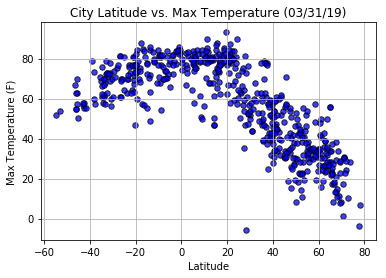

In [15]:
plt.scatter(df.Lat, df.Max_Temp, marker="o", s=30, facecolor= "Blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("scatterplots/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

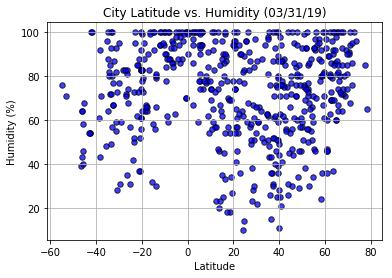

In [16]:
plt.scatter(df.Lat, df.Humidity, marker="o", s=30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("scatterplots/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

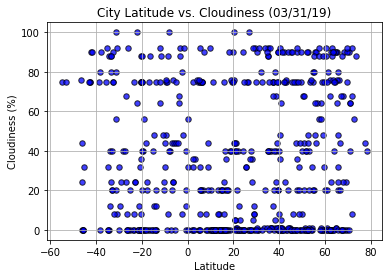

In [17]:
plt.scatter(df.Lat, df.Cloudiness, marker = "o", s=30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("scatterplots/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

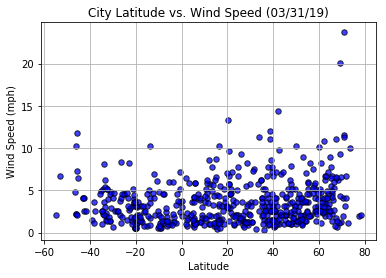

In [18]:
plt.scatter(df.Lat, df.Wind_Speed, marker= "o", s= 30, facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (03/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("scatterplots/windspeed.png")
plt.show()